In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
df["age"]=2025-df["year"]
print (df["age"])

0       11
1       11
2       19
3       15
4       18
        ..
8123    12
8124    18
8125    16
8126    12
8127    12
Name: age, Length: 8128, dtype: int64


In [4]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,age
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719,11.195989
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000,5.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000,8.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000,10.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000,14.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000,42.000000


In [5]:
#Check for missing values in the dataset and printing out the percentages
null_values=df.isnull().sum()
percentage_null_values=round((null_values/len(df))*100,2)
print(percentage_null_values)
data_dict={"missing_value_counts": null_values,
           "missing value percentage": percentage_null_values}

null_values_df=pd.DataFrame(data_dict)
null_values_df

name                  0.00
year                  0.00
selling_price         0.00
km_driven             0.00
fuel                  0.00
seller_type           0.00
transmission          0.00
owner                 0.00
mileage(km/ltr/kg)    2.72
engine                2.72
max_power             2.65
seats                 2.72
age                   0.00
dtype: float64


,missing_value_counts,missing value percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [6]:
# Drop any rows where the target variable (selling price) is missing.
df=df.dropna(subset="selling_price", inplace=True)

In [17]:
#Fill missing values in the “mileage” column with the column’s mean.
df["mileage(km/ltr/kg)"]=df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
print (df["mileage(km/ltr/kg)"])

TypeError: 'NoneType' object is not subscriptable

In [ ]:
#Remove duplicate rows from the dataset.
df_clean=df.drop_duplicates()
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0,18


In [ ]:
#Convert the “year” column into the car’s age.
df["age"]=2025-df["year"]
print(df["age"])

0       11
1       11
2       19
3       15
4       18
        ..
8123    12
8124    18
8125    16
8126    12
8127    12
Name: age, Length: 8128, dtype: int64


In [ ]:
# Check the unique values in the “fuel type” 
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
#Replace inconsistent values in the “transmission” column.
df["transmission"]=df["transmission"].replace({
    "manual":"Manual",
    "Manual":"Manual",
    "Automatic":"Automatic",
    "automatic":"Automatic"
})
df["transmission"]

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
8123    Manual
8124    Manual
8125    Manual
8126    Manual
8127    Manual
Name: transmission, Length: 8128, dtype: object

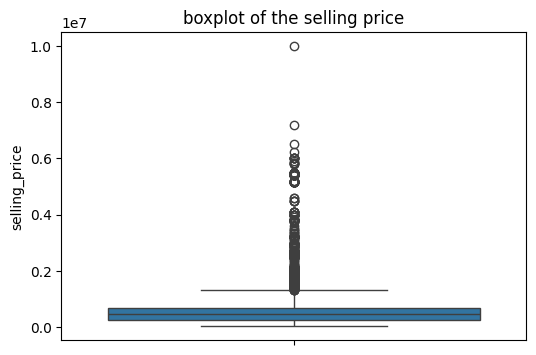

In [ ]:
##Check if there are any outliers in the “selling price” column using a boxplot
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(y=df["selling_price"])
plt.title("boxplot of the selling price")
plt.show()


In [ ]:
#Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
df=df.dropna(subset=["selling_price"])
outliers=df[(df["selling_price"]>5000000) & (df["selling_price"]<10000)]
outliers

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,age


In [ ]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces.
columns=df.columns.str.lower().str.replace(" ","-")
columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'age'],
      dtype='object')

In [ ]:
#Check if any numerical columns are stored as strings and convert them to numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   object 
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
 12  age                 8128 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 825.6+ KB


In [ ]:
df["mileage(km/ltr/kg)"]=pd.to_numeric(df["mileage(km/ltr/kg)"], errors="coerce")
df["max_power"]=pd.to_numeric(df["max_power"], errors="coerce")
print (df["max_power"])
df["mileage(km/ltr/kg)"]

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64


0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage(km/ltr/kg), Length: 8128, dtype: float64

In [ ]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df["price_per_kilometer"]=df["selling_price"]/df["mileage(km/ltr/kg)"]
print (df["price_per_kilometer"])

0       19230.769231
1       17502.365184
2        8926.553672
3        9782.608696
4        8074.534161
            ...     
8123    17297.297297
8124     8035.714286
8125    19792.746114
8126    12303.775986
8127    12303.775986
Name: price_per_kilometer, Length: 8128, dtype: float64


In [ ]:
#Ensure the dataset index is properly reset after cleaning.
df.reset_index(drop=True,inplace=True)

In [ ]:
#Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
df.to_csv("cleaned_cars.csv", index=False)

Exploratory Data Analysis (EDA) (16–30)

In [ ]:
#Find the average selling price of cars in the dataset.
average_selling_price=np.mean(df["selling_price"])
print (average_selling_price)

638271.8077017716


In [ ]:
#Find the most common fuel type in the dataset.
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

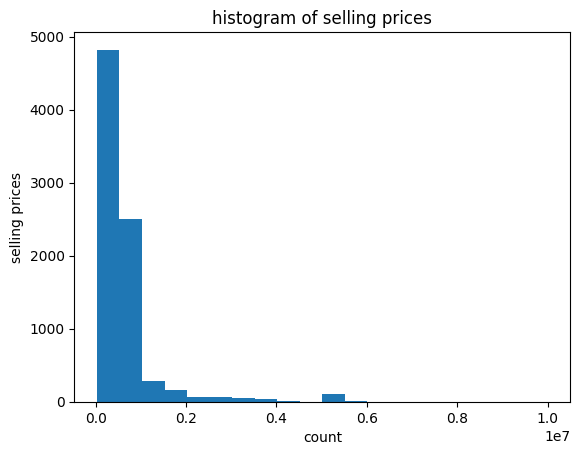

In [ ]:
#Plot a histogram of the selling prices.
plt.hist(df["selling_price"],bins=20)
plt.xlabel("count")
plt.ylabel("selling prices")
plt.title("histogram of selling prices")
plt.show()

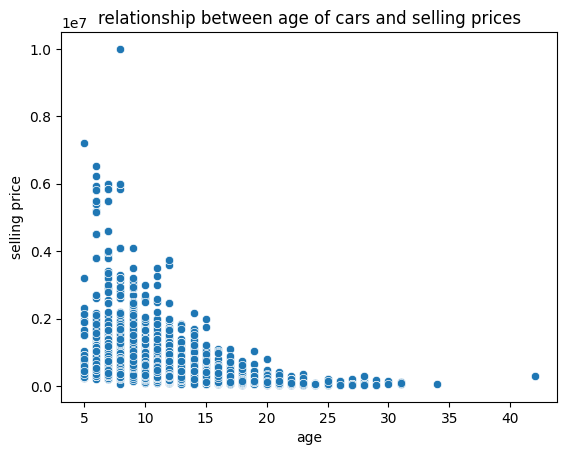

In [ ]:
#Plot the relationship between car age and selling price using a scatter plot.
sns.scatterplot(x=df["age"], y= df["selling_price"])
plt.title("relationship between age of cars and selling prices")
plt.xlabel("age")
plt.ylabel("selling price")
plt.show()

In [ ]:
#Group cars by fuel type and find the average selling price for each group.
grouped=df.groupby("fuel")["selling_price"].mean()
grouped.head()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [ ]:
#Plot a bar chart showing the number of cars per transmission type.
count=df["transmission"].value_counts()
count

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

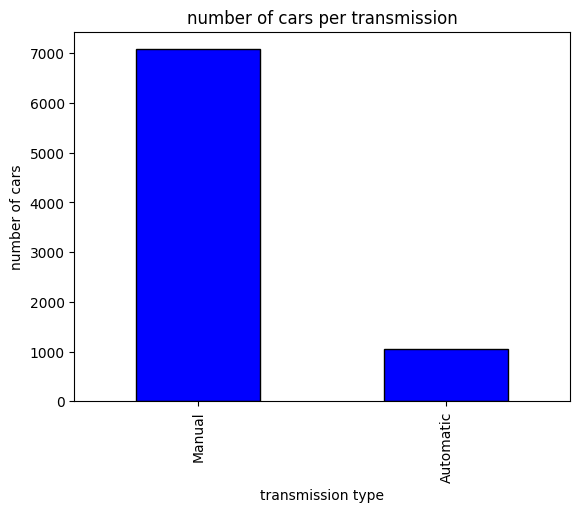

In [ ]:
count.plot(kind="bar",color="blue", edgecolor="black")
            
plt.Figure(figsize=(8,5)) 

plt.title("number of cars per transmission")
plt.xlabel("transmission type")
plt.ylabel("number of cars")
plt.show()


In [ ]:
#Find the car with the highest mileage in the dataset.
highest_milage=df["mileage(km/ltr/kg)"].max()
print (highest_milage)

42.0


In [ ]:
#Calculate the correlation between mileage and selling price.
correlation=df["mileage(km/ltr/kg)"].corr(df["selling_price"])
print ("correlation between mileage and selling price is:",correlation)

correlation between mileage and selling price is: -0.126053529004955


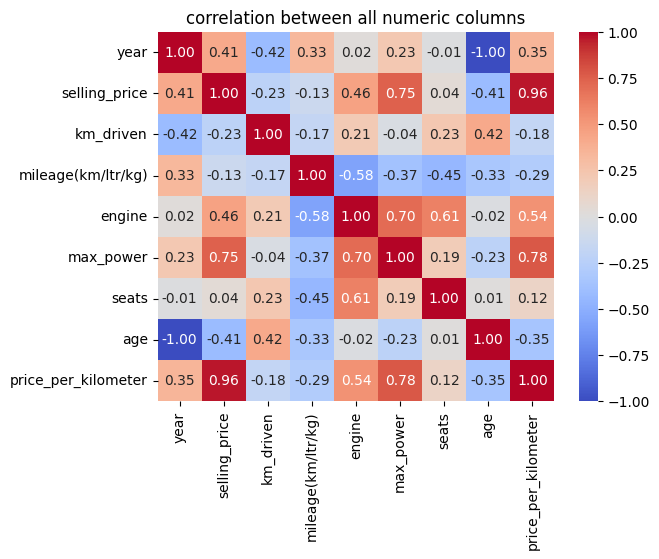

In [ ]:
#Plot a heatmap showing the correlations between all numeric columns.
correlation_matrix=df.corr(numeric_only=True)

sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation between all numeric columns")
plt.show()

In [ ]:
#Check if manual cars are generally cheaper or more expensive than automatic cars.
cost=df.groupby("transmission")["selling_price"].mean()
cost

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [ ]:
#Find the average selling price for each year of manufacture.
average_price=df.groupby("year")["selling_price"].mean().reset_index()
print (average_price)

    year  selling_price
0   1983   3.000000e+05
1   1991   5.500000e+04
2   1994   8.800000e+04
3   1995   1.075000e+05
4   1996   8.166667e+04
5   1997   9.018173e+04
6   1998   7.310000e+04
7   1999   7.583333e+04
8   2000   9.304155e+04
9   2001   4.849830e+04
10  2002   9.899996e+04
11  2003   9.563669e+04
12  2004   1.109654e+05
13  2005   1.411598e+05
14  2006   1.639044e+05
15  2007   1.777182e+05
16  2008   2.074884e+05
17  2009   2.264349e+05
18  2010   2.726218e+05
19  2011   3.237753e+05
20  2012   3.511643e+05
21  2013   4.600059e+05
22  2014   5.161932e+05
23  2015   5.966133e+05
24  2016   6.998801e+05
25  2017   8.892465e+05
26  2018   9.577695e+05
27  2019   1.776986e+06
28  2020   8.852702e+05


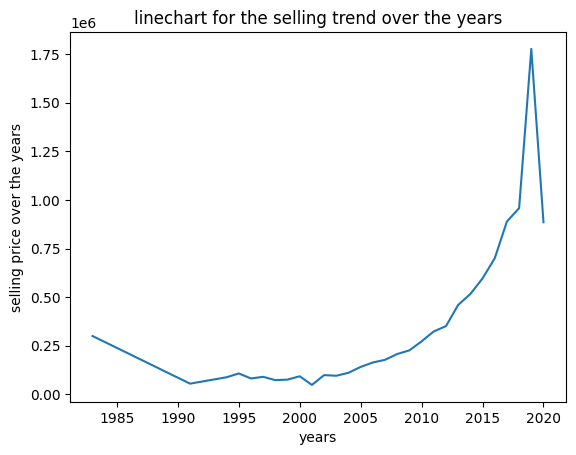

In [ ]:
#Plot a line chart showing the trend of selling prices over the years.
plt.Figure(figsize=(6,4))
sns.lineplot(data=average_price, x="year", y="selling_price", markers="o")
plt.title("linechart for the selling trend over the years")
plt.xlabel("years")
plt.ylabel("selling price over the years")
plt.show()

In [ ]:
#Find the most expensive car for each fuel type.
most_expensive=df.groupby("fuel")["selling_price"].max()
print (most_expensive)

fuel
CNG         545000
Diesel     7200000
LPG         375000
Petrol    10000000
Name: selling_price, dtype: int64


In [ ]:
#Find out which brand appears most frequently in the dataset.
most_common_brand=df["name"].value_counts().idxmax()
brand_count=df["name"].value_counts().max()
print("The most common brand is",most_common_brand, "with a brand count of",brand_count)

The most common brand is Maruti Swift Dzire VDI with a brand count of 129


In [ ]:
# Check the top 5 most common combinations of fuel type and transmission.
top_5=df[["fuel","transmission"]].value_counts().head(5)
print (top_5)

fuel    transmission
Diesel  Manual          3868
Petrol  Manual          3115
Diesel  Automatic        534
Petrol  Automatic        516
CNG     Manual            57
Name: count, dtype: int64


Machine Learning (31–40)

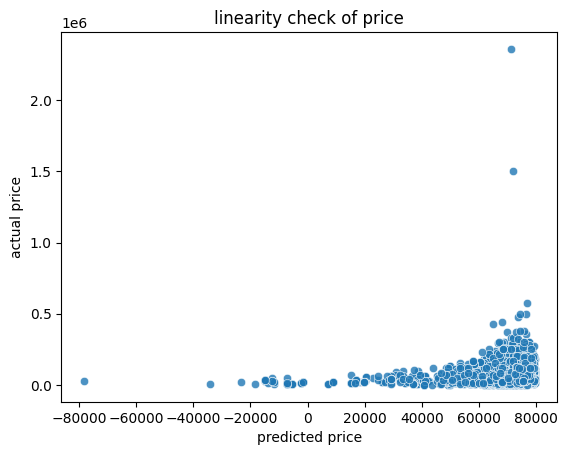

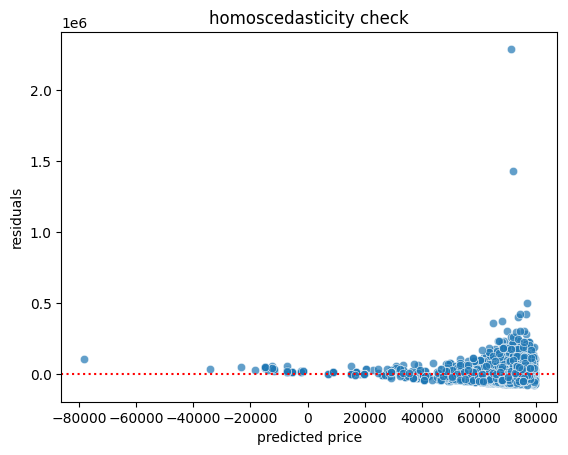

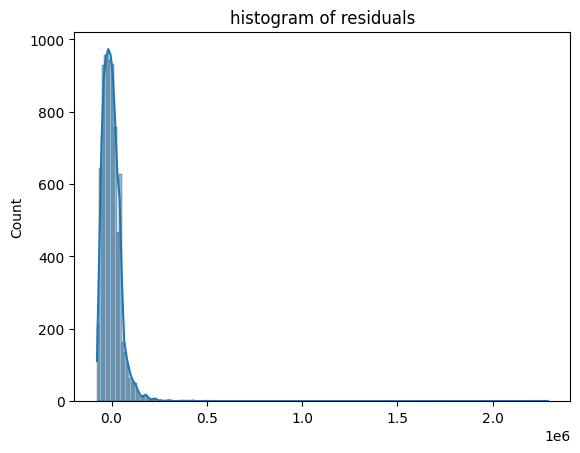

In [ ]:
## demonstrate various assumptions made on linear regression
# fit a simple regression model
x=df[["selling_price"]]
y=df["km_driven"]
x=sm.add_constant(x)

model = LinearRegression()
model.fit(x, y)
df ["predictions"]=model.predict(x)
residuals=y-df["predictions"]

## linearity check using a scatter plot

plt.Figure(figsize=(6,4))
sns.scatterplot(x=df["predictions"],y=y,alpha=0.8)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("linearity check of price")
plt.show()

# homoscedasticity to check residuals vs predictions
plt.Figure(figsize=(6,4))
sns.scatterplot(x=df["predictions"], y=residuals, alpha=0.7)
plt.axhline(0,color="red",linestyle= "dotted")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.title("homoscedasticity check")
plt.show()

## check normality of residuals
plt.Figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("histogram of residuals")
plt.show()

In [ ]:
df=df.dropna(subset=["age", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power","seats"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,age,price_per_kilometer,predictions
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231,72797.767713
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184,74063.281407
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672,77416.892697
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696,76357.024978
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161,77859.822490


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Train a Linear Regression model to predict the car’s selling price using selected features.
x=df[["age", "km_driven", "mileage(km/ltr/kg)", "engine", "max_power","seats"]]
y=df["selling_price"]

##split into train
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

# train linear regression
model=LinearRegression()
model.fit(x_train, y_train)

#print coefficient and intercept
print("intercept:",model.intercept_)
print ("slope:", model.coef_)


intercept: -261481.2571590254
slope: [-3.83001384e+04 -1.87783020e+00  1.17749821e+04  1.27554829e+02
  1.54958538e+04 -6.93227555e+04]


In [ ]:
## Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
#Also, explain in your own words what each metric tells you about the model’s performance.
y_pred=model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(y_test, y_pred)
mean_error=mean_squared_error(y_test, y_pred)

print ("r2_score is:", r2)
print ("mean squared error is:", mean_error)




r2_score is: 0.6491529477576627
mean squared error is: 246539454751.3608


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict

In [ ]:
#Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
#Explain what Lasso Regression does differently and why it can be useful when you have many features.
lasso=Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(x_test)

print("mse is:", mean_squared_error(y_test,y_pred_lasso))
print ("r2 score is:", r2_score(y_test,y_pred_lasso))

mse is: 246539528904.38852
r2 score is: 0.6491528422314652


In [ ]:
#Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
#Discuss why Ridge might perform better or worse in certain cases.
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

print ("mse is:", mean_squared_error(y_test, y_pred_ridge))
print ("r2 score is:", r2_score(y_test,y_pred_ridge))


mse is: 246540216389.3147
r2 score is: 0.6491518638807179


In [ ]:
# Use cross-validation to evaluate your Ridge Regression model.
#Explain why cross-validation gives a better estimate of model performance than a single train-test split.
# Ridge Regression with Cross-Validation
# -------------------------
ridge = Ridge(alpha=1.0)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ridge, x, y, cv=kf, scoring="r2")

print("Cross-validation R² scores:", scores)
print("Average R²:", np.mean(scores))

Cross-validation R² scores: [0.65127293 0.62523466 0.62429678 0.62072739 0.66096075]
Average R²: 0.6364985022078591


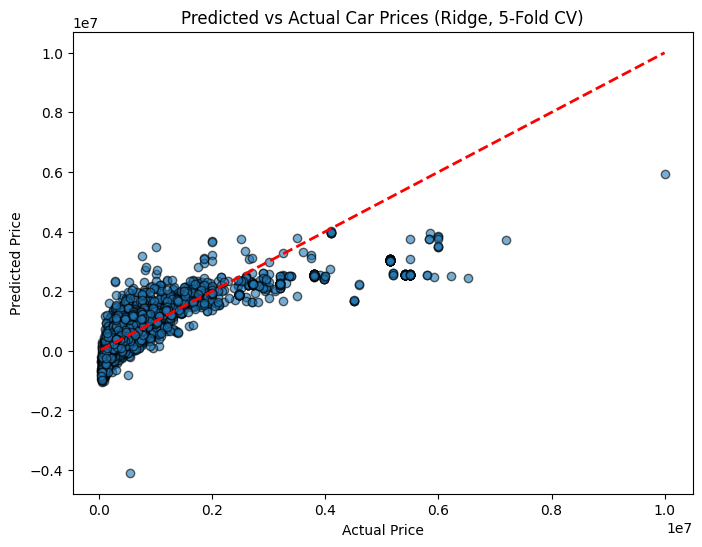

In [ ]:
# Plot the predicted vs actual prices for your best-performing model.
#Discuss what the plot reveals about the accuracy of your predictions.
# Cross-validation predictions
y_pred = cross_val_predict(ridge, x, y, cv=kf)

# Scatter plot Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # ideal line

plt.title("Predicted vs Actual Car Prices (Ridge, 5-Fold CV)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()